<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Taxi Trip Fare-MachineHack</h1>
</div>

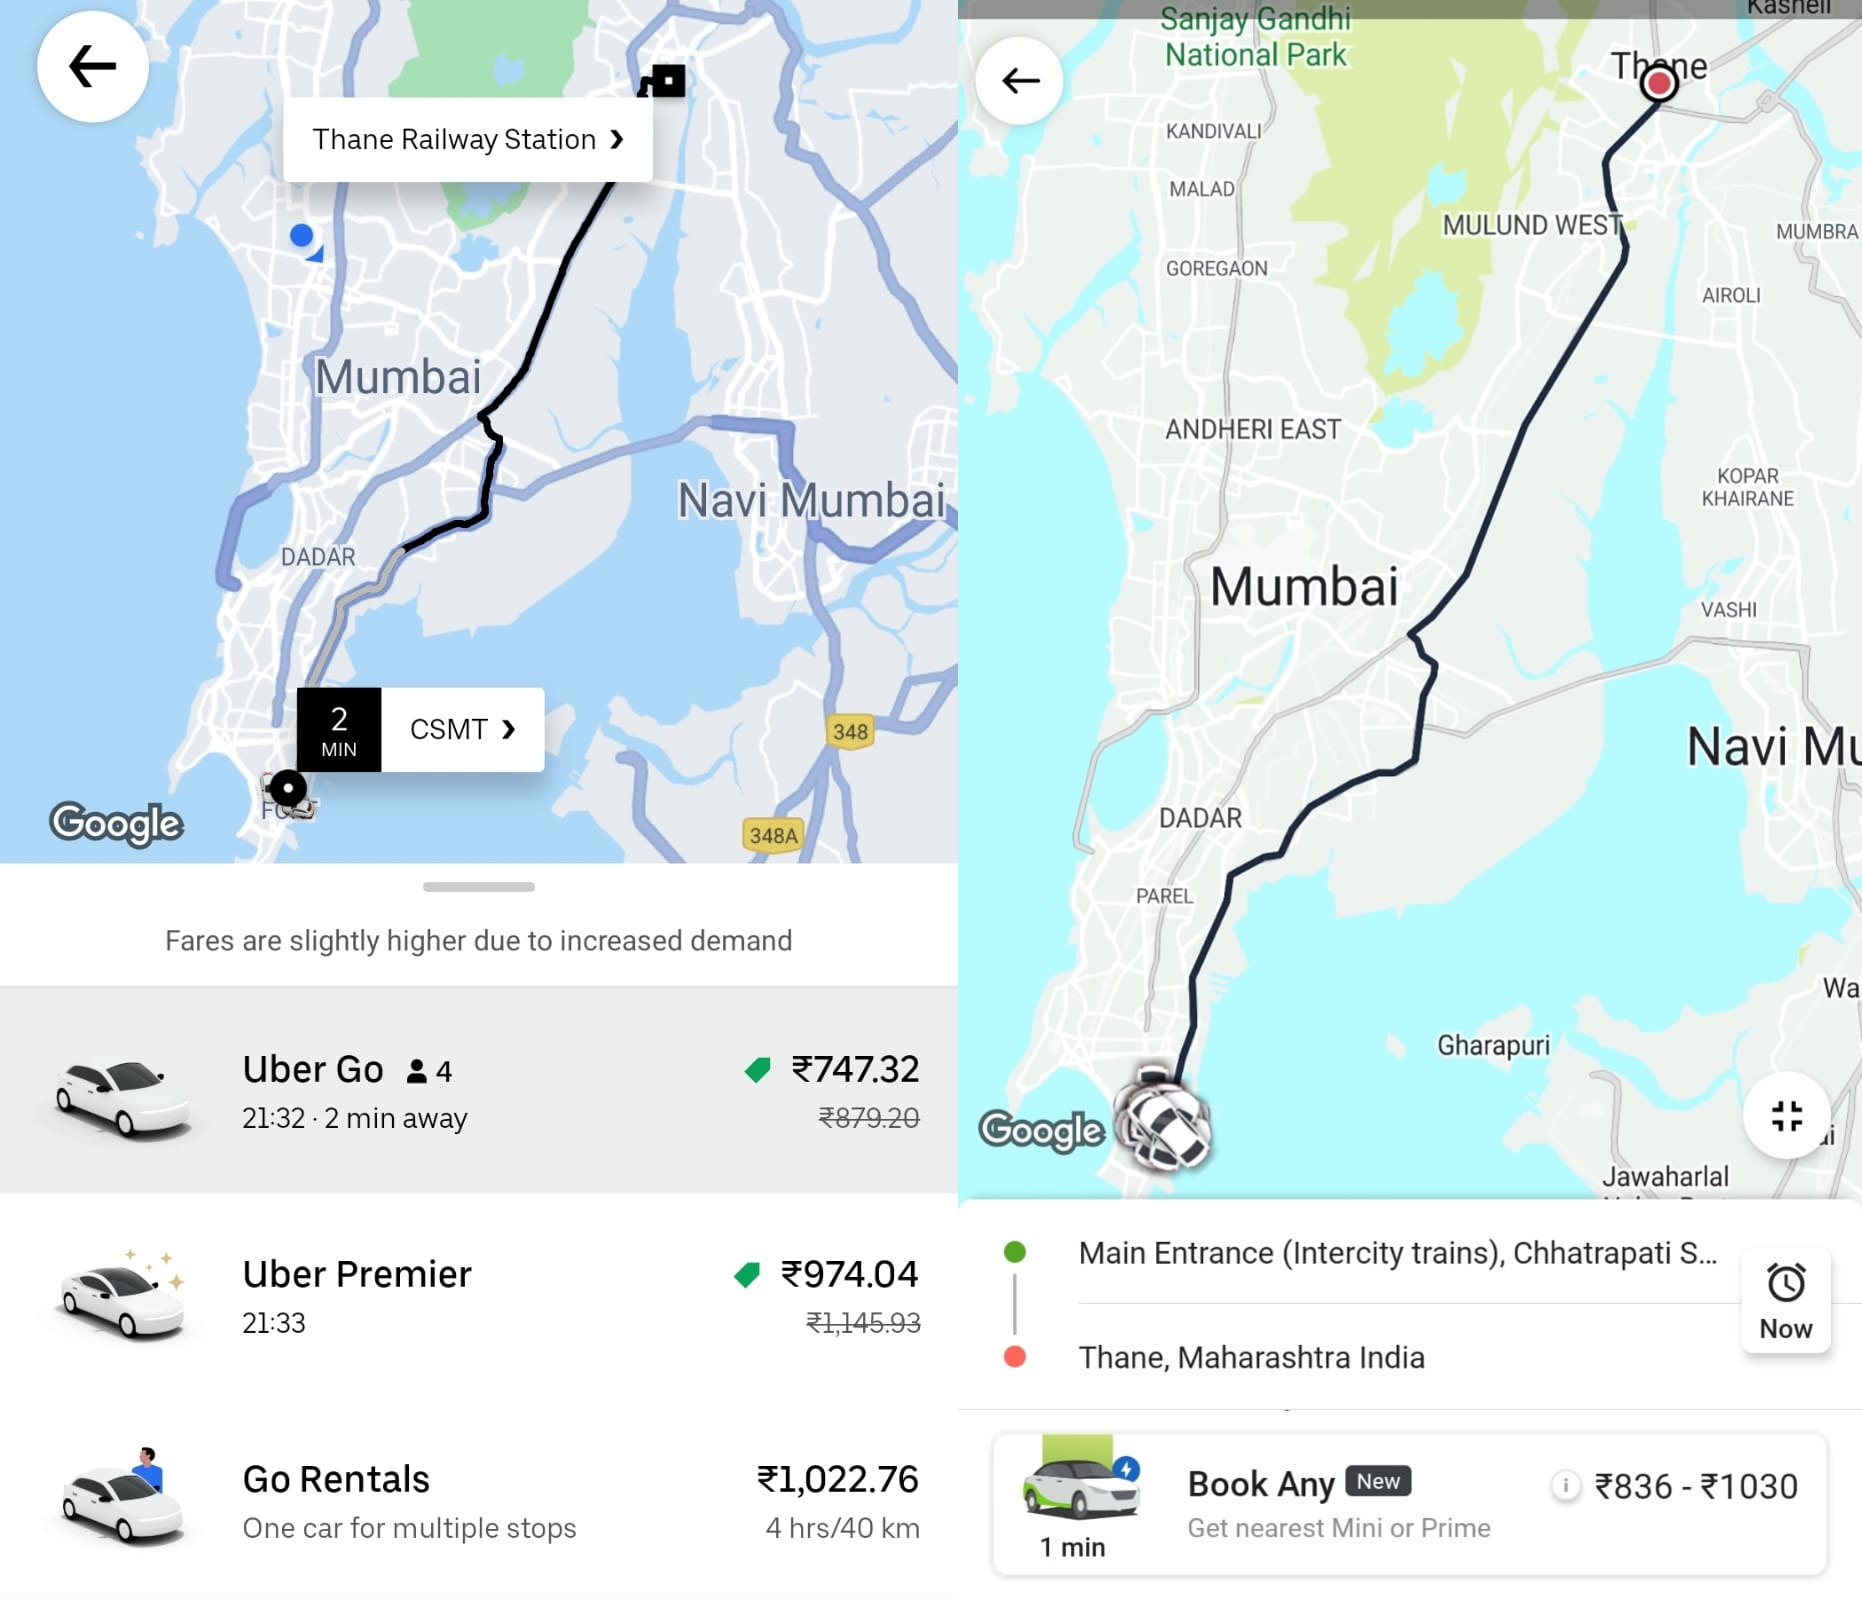

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- MachineHack (Hackathon - 17 Nov to 17 Dec 2022)
    
Problem Statement:- Build a machine learning-based approach to predict the taxi trip fare.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [24]:
# Data manipulation
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

CatBoost version 1.1.1
NumPy version 1.20.1
Pandas version 1.2.4
seaborn version 0.11.1
sklearn version 0.24.1
xgboost version 1.7.1
lightgbm version 3.3.3


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [25]:
train = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\Trip\train.csv')
test = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\Trip\test.csv')
submission = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\Trip\submission.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [26]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  int64  
 12  dropoff_location_id      35000 non-null  int64  
 13  year                     35000 non-null  int64  

In [27]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About Train Data:-

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0           9.01          1                  N             1         26.0   
1           0.20          1                  N             1          3.0   
2           9.65          1                  N             1         41.5   
3           9.50          1                  N             1         30.0   
4           5.80          1                  N             1         21.5   

   extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0    0.0      0.5        8.14          5.76            0.3         40.70   
1    0.0      0.5        0.75          0.00            0.3          4.55   
2    0.0      0.5        9.61          5.76            0.3         57.67   
3    0.5      0.5        9.25          5.76            0.3         46.31   
4    0.5      0.5        4.56          0.00            0.3         27.36   

   pickup_location_id  dropoff_location_id  year  month  day

In [28]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

       trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
34995          22.43          1                  N             1         59.5   
34996           9.16          1                  N             1         30.0   
34997           6.78          1                  N             1         23.0   
34998           0.26          1                  N             2          3.0   
34999          18.40          1                  N             1         53.0   

       extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
34995    0.5      0.5       10.00          5.76            0.3         76.56   
34996    0.0      0.5        6.58          5.76            0.3         43.14   
34997    0.0      0.5        5.95          0.00            0.3         29.75   
34998    0.0      0.5        0.00          0.00            0.3          3.80   
34999    1.0      0.5       10.96          0.00            0.3         65.76   

       picku

In [29]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,34823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.088815,1.110086,NaN,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,152.543943,146.852200,2018.0,6.132429,15.337743,2.885200,13.803657,2257.38360,41.324249
std,4.496854,0.581456,NaN,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,59.764598,76.373292,0.0,3.342088,8.691250,1.926999,6.224485,5112.41526,19.167043
min,0.010000,1.000000,NaN,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.00000,0.310000
25%,6.470000,1.000000,NaN,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1448.00000,30.300000
50%,8.700000,1.000000,NaN,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1862.00000,38.460000
75%,10.990000,1.000000,NaN,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,186.000000,229.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2340.00000,48.200000


In [30]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
count,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,14916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.103765,1.100133,NaN,1.124467,31.839195,0.322007,0.487033,6.150660,2.250380,0.299920,41.359166,152.239133,145.618667,2018.0,6.124067,15.242733,2.876267,13.840733,2234.605000
std,4.480066,0.550751,NaN,0.348209,14.499355,0.419592,0.079471,4.525842,3.440184,0.004898,19.210809,59.598449,76.352283,0.0,3.324166,8.670526,1.920591,6.219299,4843.770638
min,0.010000,1.000000,NaN,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.000000
25%,6.500000,1.000000,NaN,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1461.000000
50%,8.730000,1.000000,NaN,1.000000,29.000000,0.000000,0.500000,6.055000,0.000000,0.300000,38.410000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1863.000000
75%,10.940000,1.000000,NaN,1.000000,36.000000,0.500000,0.500000,8.060000,5.760000,0.300000,48.092500,186.000000,226.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2356.000000


In [31]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
trip_distance,0,0.0
rate_code,0,0.0
store_and_fwd_flag,0,0.0
payment_type,0,0.0
fare_amount,0,0.0
extra,0,0.0
mta_tax,0,0.0
tip_amount,0,0.0
tolls_amount,0,0.0
imp_surcharge,0,0.0


In [32]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
trip_distance,0,0.0
rate_code,0,0.0
store_and_fwd_flag,0,0.0
payment_type,0,0.0
fare_amount,0,0.0
extra,0,0.0
mta_tax,0,0.0
tip_amount,0,0.0
tolls_amount,0,0.0
imp_surcharge,0,0.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


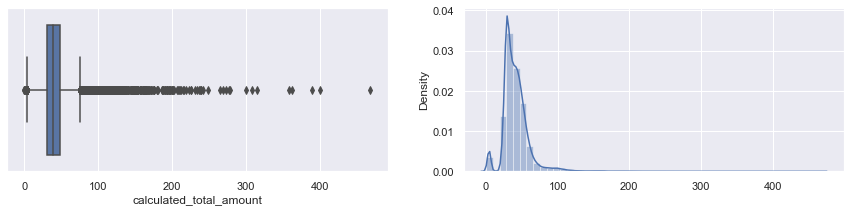

In [33]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='calculated_total_amount', data=train);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train['calculated_total_amount']);

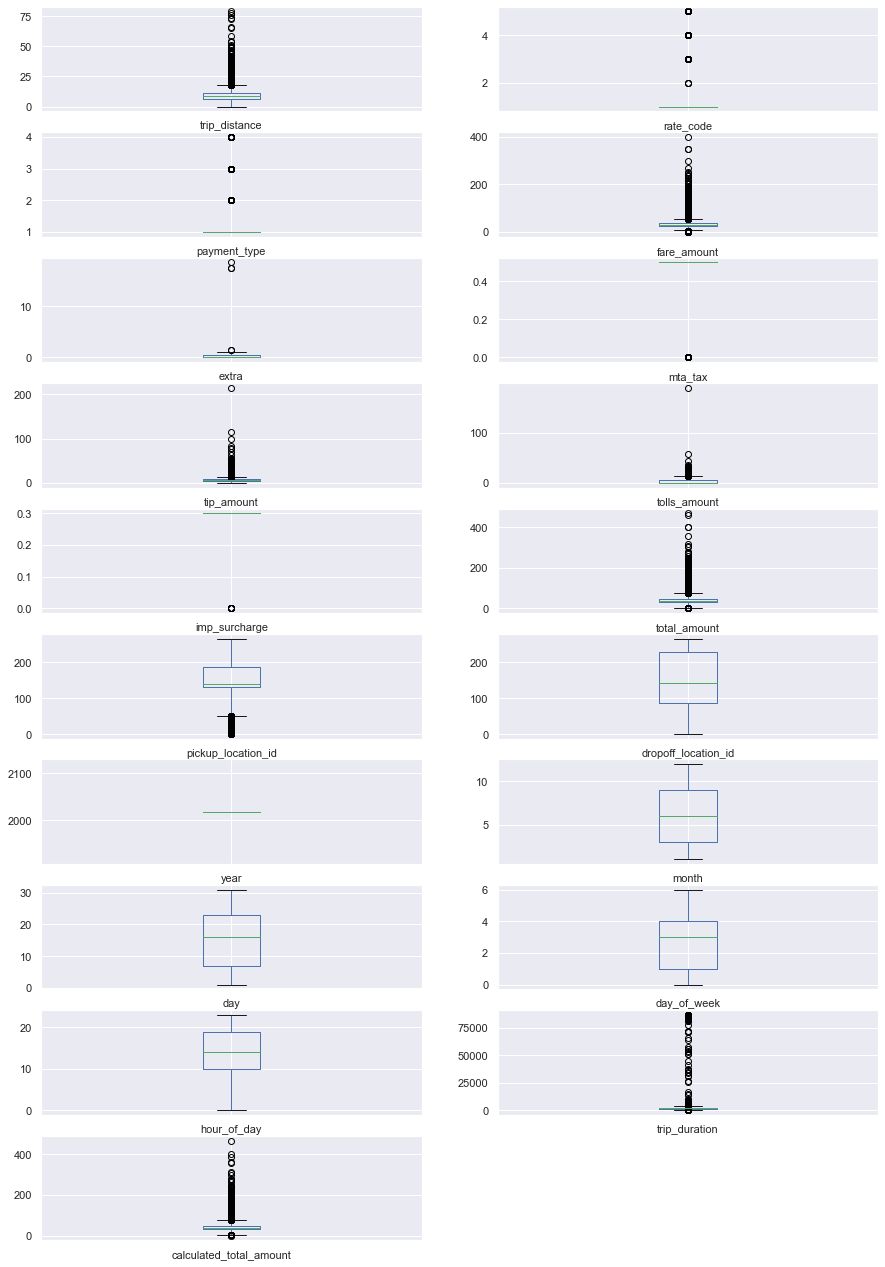

In [34]:
train.plot(kind="box",subplots=True,layout=(11,2),figsize=(15,25));

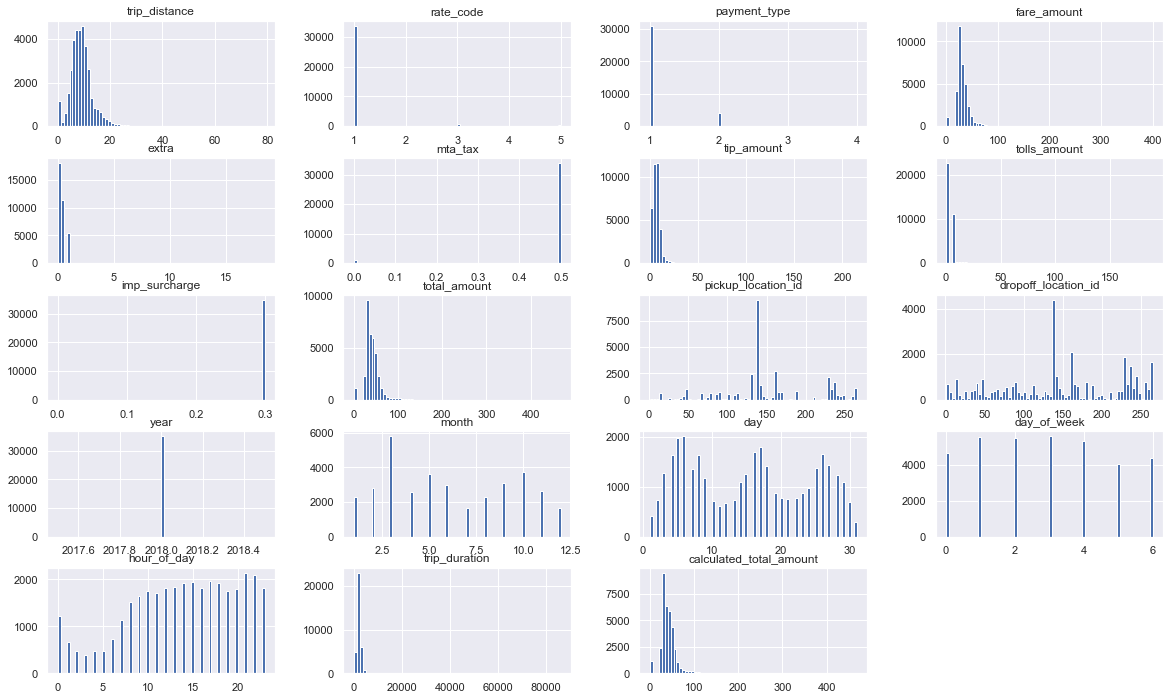

In [35]:
# Histogram to check for Data Distribution
train.hist(bins=70,figsize=(20,12));

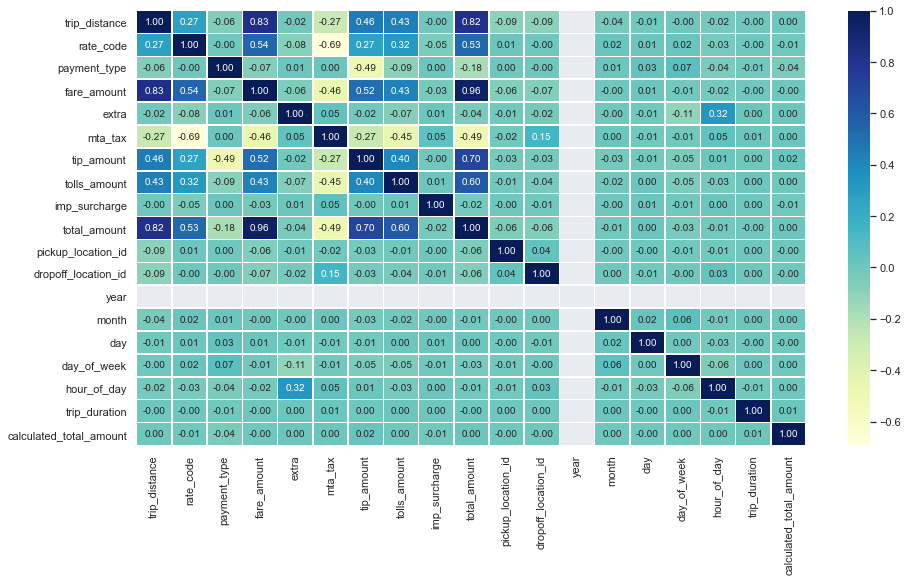

In [36]:
# Check the correlation
fig , ax = plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5);

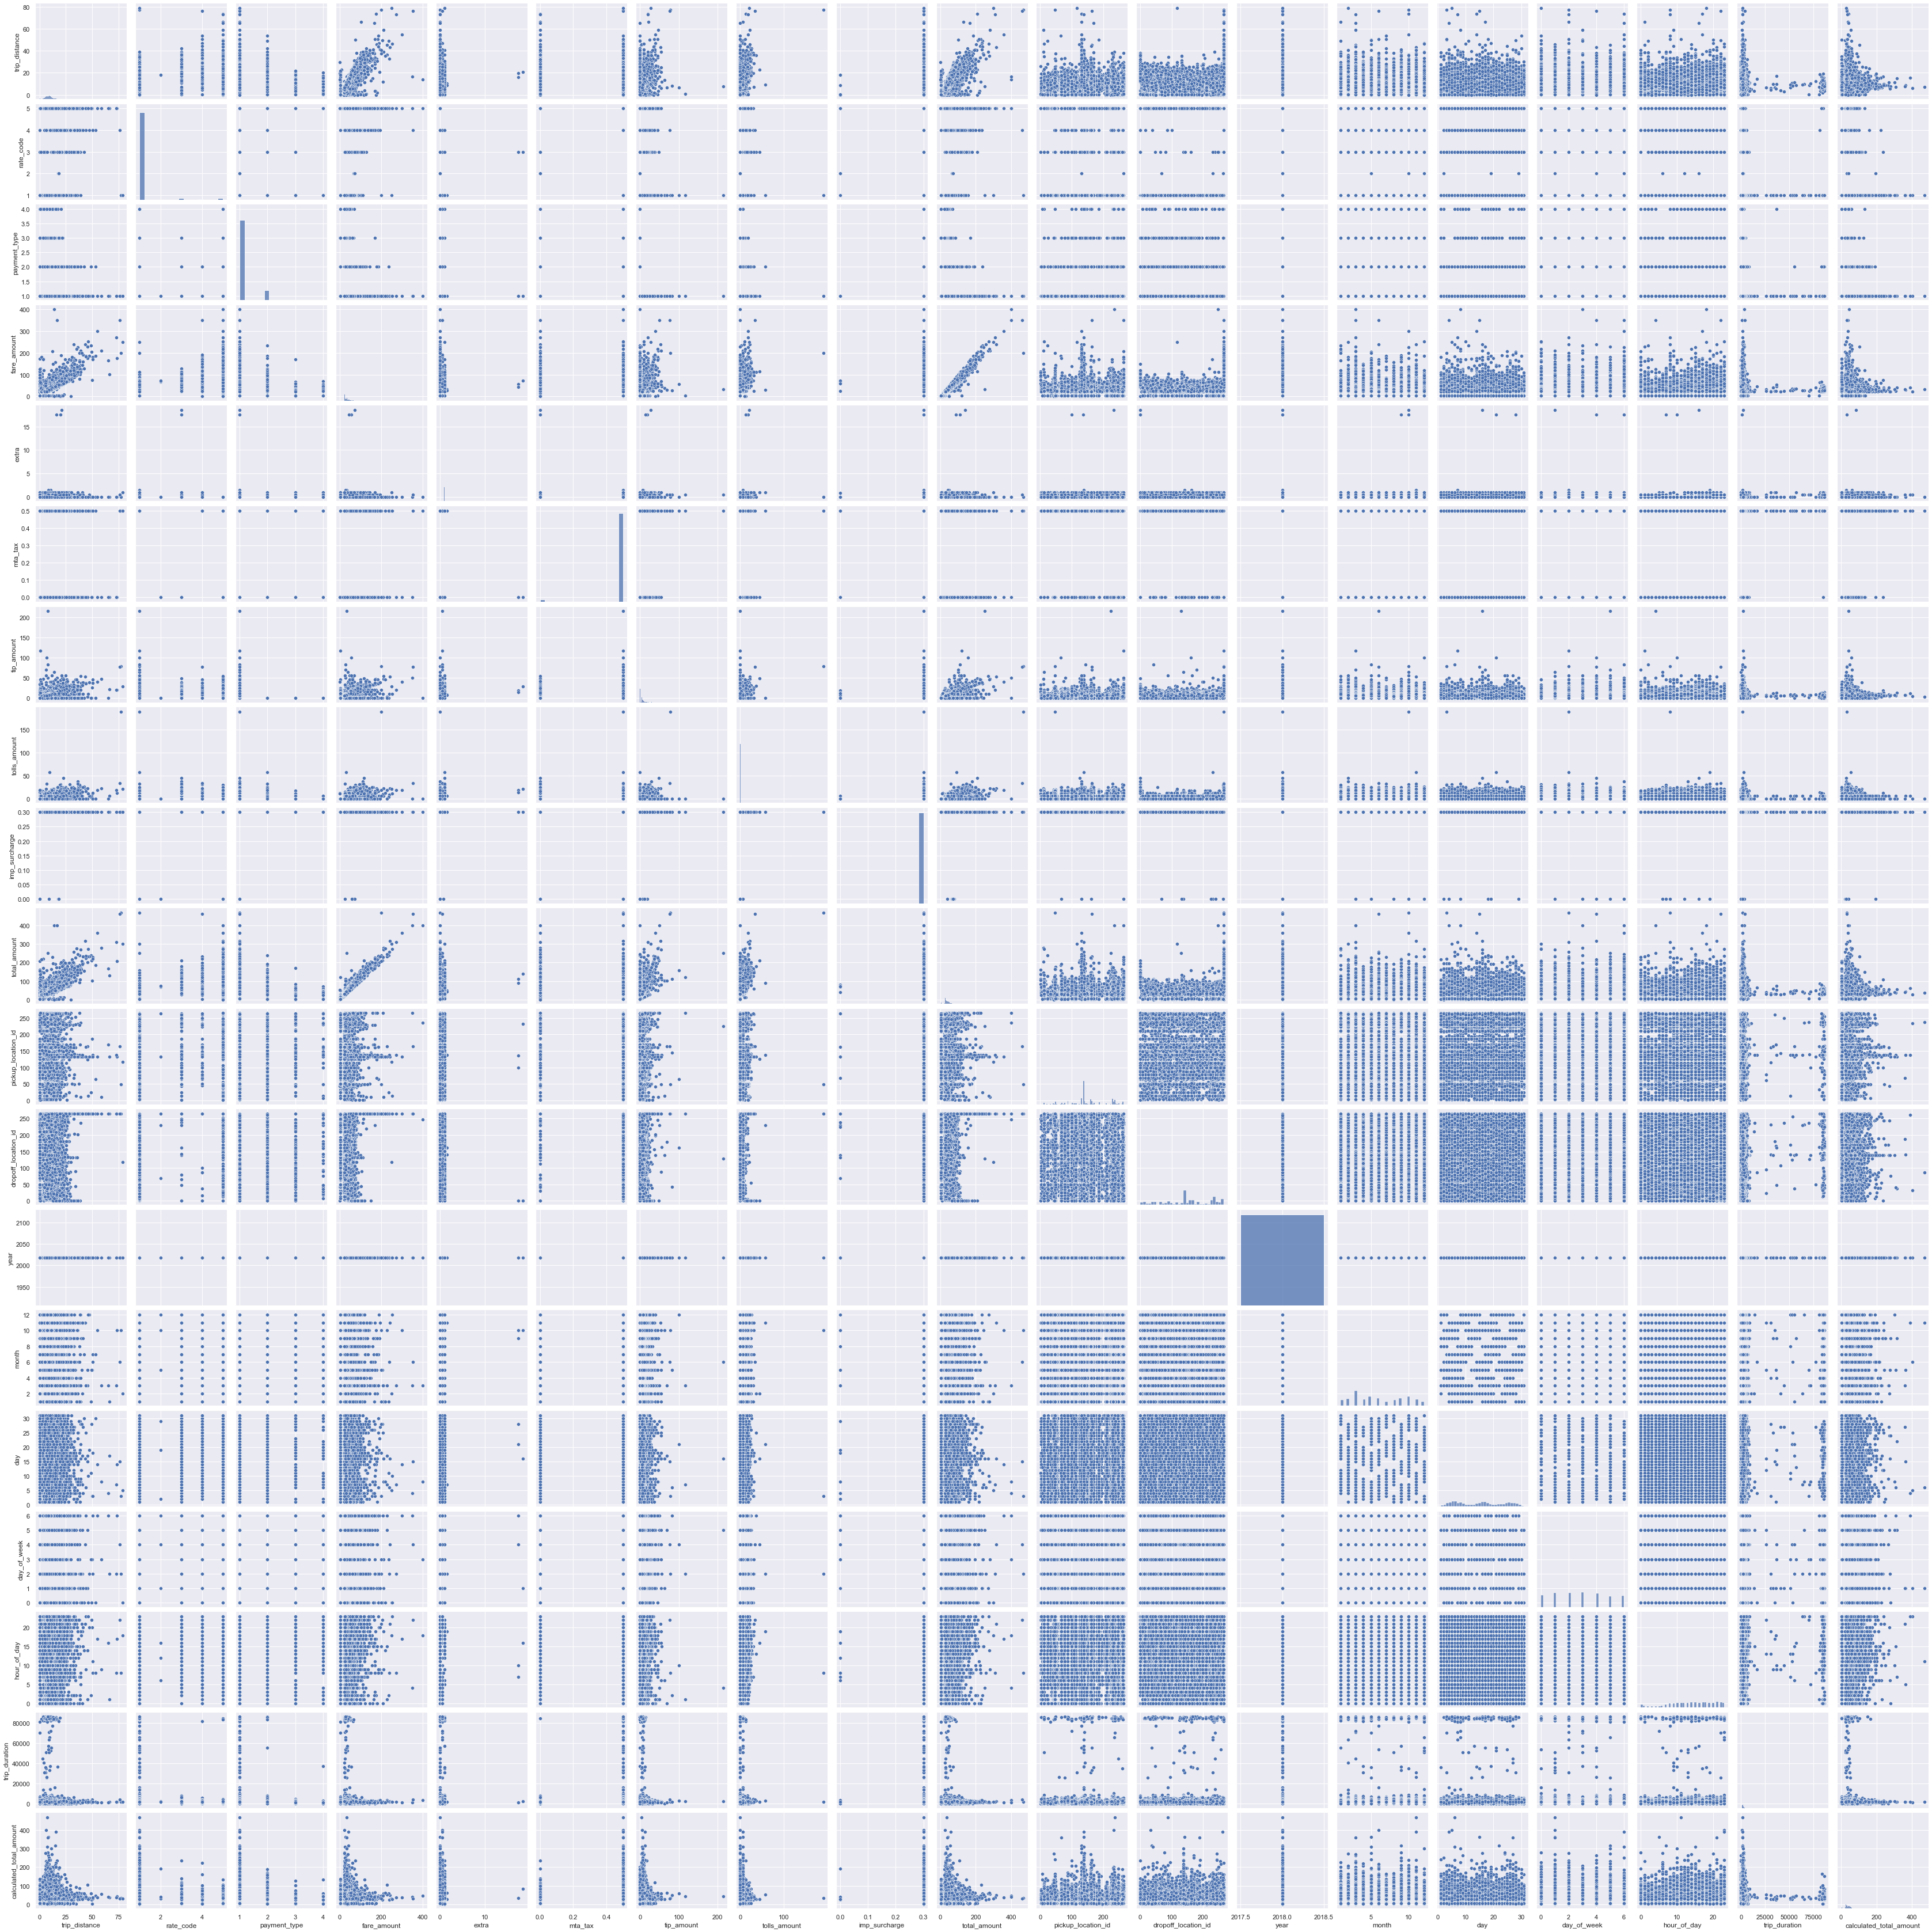

In [37]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

#### * Handling of "store_and_fwd_flag" Variable

In [38]:
#train['store_and_fwd_flag'].value_counts()
train['store_and_fwd_flag']=train['store_and_fwd_flag'].map({'N':0, 'Y':1})
#print(train['store_and_fwd_flag'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

#### * Handling of "store_and_fwd_flag" Variable

In [39]:
#test['store_and_fwd_flag'].value_counts()
test['store_and_fwd_flag']=test['store_and_fwd_flag'].map({'N':0, 'Y':1})
#print(test['store_and_fwd_flag'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [40]:
train.isnull().sum()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [41]:
test.isnull().sum()

trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
year                   0
month                  0
day                    0
day_of_week            0
hour_of_day            0
trip_duration          0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [42]:
train = train.drop(['imp_surcharge','mta_tax','store_and_fwd_flag','rate_code','payment_type'
                   ,'fare_amount','extra','tolls_amount','dropoff_location_id'
                   ,'year','month','day','day_of_week','hour_of_day','trip_distance'],axis=1)
print('-------------'*9)
test = test.drop(['imp_surcharge','mta_tax','store_and_fwd_flag','rate_code','payment_type'
                   ,'fare_amount','extra','tolls_amount','dropoff_location_id'
                   ,'year','month','day','day_of_week','hour_of_day','trip_distance'],axis=1)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tip_amount               35000 non-null  float64
 1   total_amount             35000 non-null  float64
 2   pickup_location_id       35000 non-null  int64  
 3   trip_duration            35000 non-null  float64
 4   calculated_total_amount  35000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.3 MB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tip_amount          15000 non-null  float64
 1   total_amount        15000 non-null  float64
 2   pickup_location_id  15000 non-null  int64  
 3   trip_duration       15000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 468.9 KB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [47]:
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp)
      ,"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='calculated_total_amount'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)
print("\nLABELS ARE:-",label)

print('-------------'*9)

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 35000 
Length of Train Data:- 34650 
Length of Test Data:- 350
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['tip_amount', 'total_amount', 'pickup_location_id', 'trip_duration']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- calculated_total_amount
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model- Histogram Gradient Boosting Regression</h2>
</div>

In [48]:
model1 = HistGradientBoostingRegressor()
model1.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Hist Gradient Boosting Regressor on training set: 0.02
Accuracy of Hist Gradient Boosting Regressor on test set: -0.02
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [49]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict(x) #Score:- 19.45867
df1=pd.DataFrame(y_pred1,columns=['calculated_total_amount'])
df1.to_csv(r'C:\Users\abarphe\Favorites\MH\Trip\Best_Final_Submission_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Score:-**

**1) Public Leaderboard :-** 19.45867

**2) Private Leaderboard :-** 19.16595


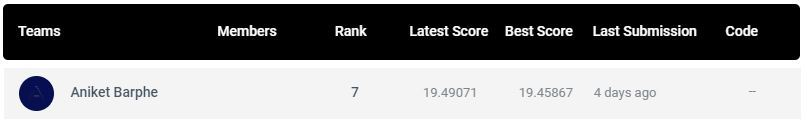

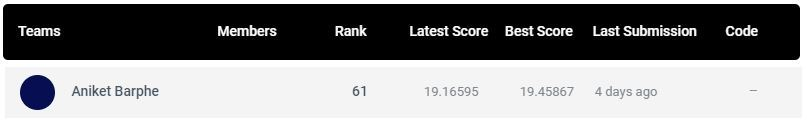

**Competition Link:-** https://machinehack.com/hackathons/iiit_nr_taxi_trip_fare_prediction_challenge/leaderboard

**Rank Scored:-**

a) **07** out of **441** registered participants (Public Leaderboard)

b) **61** out of **441** registered participants (Private Leaderboard)